In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Get The Data
set index_col=0 to use the first column as index

In [2]:
df=pd.read_csv("Classified Data",index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X=df.drop(['TARGET CLASS'],axis=1)
y=df['TARGET CLASS']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

# Standardize the Variables

In [13]:
from sklearn.preprocessing import StandardScaler
scaller=StandardScaler()
stdsc=StandardScaler()
X_train_sc=stdsc.fit_transform(X_train)
X_test_sc=stdsc.transform(X_test)


In [16]:
df_feat=pd.DataFrame(X_train_sc,columns=X.columns)

In [17]:
X.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [18]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.164283,1.747573,0.208446,0.234965,-1.262972,2.068506,0.527576,0.224223,-1.361012,-0.713466
1,-1.267159,-1.246912,-0.488279,1.223122,0.132597,-0.400626,-0.950585,0.880595,-0.231566,1.524300
2,1.296449,-1.642580,-1.209501,0.392746,1.380080,-0.861136,-1.037721,0.594412,0.115322,-0.269111
3,1.604854,-0.459034,-1.465008,-0.354665,0.542233,0.200418,-0.538429,0.145707,1.172856,-1.502155
4,-1.096972,1.607145,0.543386,1.249851,-0.995245,1.275011,0.403895,1.163473,1.273911,-1.631720


# Using KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1])

In [31]:
len(pred)

200

In [32]:
pred != y_test

993    False
859    False
298    False
553     True
672    False
       ...  
679    False
722    False
215     True
653    False
150    False
Name: TARGET CLASS, Length: 200, dtype: bool

# Prediction And Evaluations

In [36]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [21]:
print(confusion_matrix(y_test,pred))

[[ 74  12]
 [ 12 102]]


In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        86
           1       0.89      0.89      0.89       114

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



# Choosing a K value

In [23]:
error_rate=[]

for i  in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [33]:
print(error_rate)

[0.12, 0.125, 0.075, 0.095, 0.055, 0.06, 0.06, 0.065, 0.06, 0.055, 0.06, 0.06, 0.055, 0.075, 0.07, 0.075, 0.08, 0.08, 0.07, 0.07, 0.06, 0.065, 0.07, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.055, 0.055, 0.055, 0.06, 0.06, 0.06, 0.06, 0.065, 0.06, 0.06]


Text(0, 0.5, 'error rate')

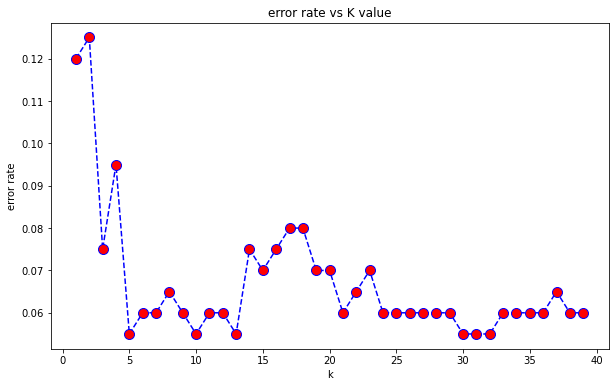

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="blue",linestyle="dashed",marker='o',markerfacecolor="red",markersize=10)
plt.title("error rate vs K value")
plt.xlabel("k")
plt.ylabel("error rate")

In [37]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print("with k=1")
print("\n")
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))
print("\n")

print(accuracy_score(y_test,pred))

with k=1


[[ 74  12]
 [ 12 102]]


              precision    recall  f1-score   support

           0       0.86      0.86      0.86        86
           1       0.89      0.89      0.89       114

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



0.88


In [38]:
knn=KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print("with k=21")
print("\n")
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))
print("\n")

print(accuracy_score(y_test,pred))

with k=21


[[ 77   9]
 [  3 111]]


              precision    recall  f1-score   support

           0       0.96      0.90      0.93        86
           1       0.93      0.97      0.95       114

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.94       200
weighted avg       0.94      0.94      0.94       200



0.94
